In [47]:
import math
import openseespy.opensees as ops
import opsvis as opsv
import matplotlib.pyplot as plt

In [48]:
ops.wipe()
ops.model('basic','-ndm',2,'-ndf',3)

In [49]:
def Boxsection(secID, matID, b,h,t, nfdw, nftw, nfbf, nftf,  orient="Strong"):
    
    # Python Function to Create A Box Section Fiber
    # Written by @siwalan
    # Inspired by Wsection.tcl from Remo M. de Souza
    # Last Modified : 22 June 2022
    # input parameters
    # secID - section ID number
    # matID - material ID number 
    # b  = width of the box section - outer to outer
    # h  = depth of the box section - outer to outer
    # t  = thickness of box section

    # nfdw = number of fibers along web depth 
    # nftw = number of fibers along web thickness
    # nfbf = number of fibers along flange width
    # nftf = number of fibers along flange thickness
    
    
    if (orient == "Strong"):
        hh = (h-t)
        y1 = -h/2
        y2 = -hh/2
        y3 = hh/2
        y4 = h/2
        
        bb = (b-t)
        z1 = -b/2
        z2 = -bb/2
        z3 = bb/2
        z4 = b/2
        
        
        ops.section('Fiber',secID)
        ops.patch('quad',matID, nfdw, nftw, *[y1,z1], *[y1,z4], *[y2,z4], *[y2,z1]);
        ops.patch('quad',matID, nfbf, nftf, *[y2,z1], *[y2,z2], *[y3,z2], *[y3,z1]);
        ops.patch('quad',matID, nfbf, nftf, *[y2,z3], *[y2,z4], *[y3,z4], *[y3,z3]);
        ops.patch('quad',matID, nfdw, nftw, *[y3,z1], *[y3,z4], *[y4,z4], *[y4,z1]);
    else:
        bb = (b-t)
        y1 = -b/2
        y2 = -bb/2
        y3 = bb/2
        y4 = b/2
        
        hh = (h-t)
        z1 = -h/2
        z2 = -hh/2
        z3 = hh/2
        z4 = h/2
        
        ops.section('Fiber',secID)
        ops.patch('quad',matID, nfdw, nftw, *[y1,z1], *[y1,z4], *[y2,z4], *[y2,z1]);
        ops.patch('quad',matID, nfbf, nftf, *[y2,z1], *[y2,z2], *[y3,z2], *[y3,z1]);
        ops.patch('quad',matID, nfbf, nftf, *[y2,z3], *[y2,z4], *[y3,z4], *[y3,z3]);
        ops.patch('quad',matID, nfdw, nftw, *[y3,z1], *[y3,z4], *[y4,z4], *[y4,z1]);



Warning! Patch quad is non-convex or counter-clockwise defined or has at least 3 colinear points in line

Warning! Patch quad is non-convex or counter-clockwise defined or has at least 3 colinear points in line

Warning! Patch quad is non-convex or counter-clockwise defined or has at least 3 colinear points in line

Warning! Patch quad is non-convex or counter-clockwise defined or has at least 3 colinear points in line


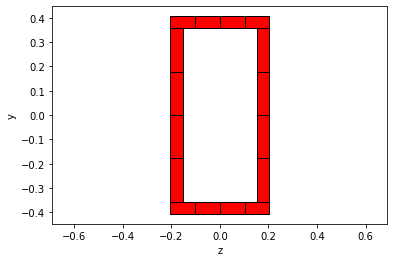

In [72]:
b = 16.0*inch; h = 32*inch; t = 1.96*inch;

hh = (h-2*t)
y1 = -h/2
y2 = -hh/2
y3 = hh/2
y4 = h/2

bb = (b-2*t)
z1 = -b/2
z2 = -bb/2
z3 = bb/2
z4 = b/2

nfdw, nftw, nfbf, nftf = [4,1,1,4]

fib_sec_1 = [['section', 'Fiber', 1],
         ['patch', 'quad',matID, nfdw, nftw, *[y1,z1], *[y1,z4], *[y2,z4], *[y2,z1]], 
         ['patch', 'quad',matID, nfbf, nftf, *[y2,z1], *[y2,z2], *[y3,z2], *[y3,z1]], 
         ['patch', 'quad',matID, nfbf, nftf, *[y2,z3], *[y2,z4], *[y3,z4], *[y3,z3]],
         ['patch', 'quad',matID, nfdw, nftw, *[y3,z1], *[y3,z4], *[y4,z4], *[y4,z1]],
         ]
matcolor = ['r', 'lightgrey', 'gold', 'w', 'w', 'w']
opsv.plot_fiber_section(fib_sec_1, matcolor=matcolor)
plt.axis('equal')
plt.show()


Warning! Patch quad is non-convex or counter-clockwise defined or has at least 3 colinear points in line

Warning! Patch quad is non-convex or counter-clockwise defined or has at least 3 colinear points in line

Warning! Patch quad is non-convex or counter-clockwise defined or has at least 3 colinear points in line

Warning! Patch quad is non-convex or counter-clockwise defined or has at least 3 colinear points in line


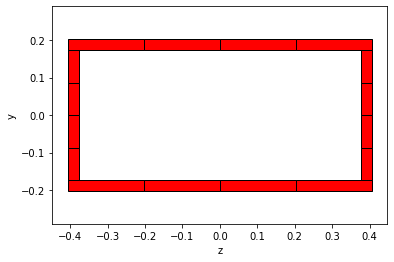

In [73]:
b = 16.0*inch; h = 32*inch; t = 1.18*inch;

bb = (b-2*t)
y1 = -b/2
y2 = -bb/2
y3 = bb/2
y4 = b/2

hh = (h-2*t)
z1 = -h/2
z2 = -hh/2
z3 = hh/2
z4 = h/2

nfdw, nftw, nfbf, nftf = [4,1,1,4]

fib_sec_1 = [['section', 'Fiber', 1],
         ['patch', 'quad',matID, nfdw, nftw, *[y1,z1], *[y1,z4], *[y2,z4], *[y2,z1]], 
         ['patch', 'quad',matID, nfbf, nftf, *[y2,z1], *[y2,z2], *[y3,z2], *[y3,z1]], 
         ['patch', 'quad',matID, nfbf, nftf, *[y2,z3], *[y2,z4], *[y3,z4], *[y3,z3]],
         ['patch', 'quad',matID, nfdw, nftw, *[y3,z1], *[y3,z4], *[y4,z4], *[y4,z1]],
         ]
matcolor = ['r', 'lightgrey', 'gold', 'w', 'w', 'w']
opsv.plot_fiber_section(fib_sec_1, matcolor=matcolor)
plt.axis('equal')
plt.show()

In [56]:
meter = 1;
mm = 1/1000*meter;
Newton = 1
inch = 25.4*mm;
kip = 4448.2216*Newton;
sec = 1;

# Dependent units
sq_in = inch*inch;
ksi = kip/sq_in;
ft = 12*inch;

# Constants
pi = math.acos(-1);

LCol = 13*ft;
LBeam = 30*ft;

ops.node(1,0,0)
ops.node(2,0,LCol)
    
## Material for Column
FyCol = 345/(1000**-2)  ;
EsCol=200000/(1000**-2)  ;
nu = 0.3
b = 0.04
ops.uniaxialMaterial('Steel01',1,FyCol,EsCol,b)

In [57]:
nfdw, nftw, nfbf, nftf = [4,1,1,4]
b = 16.0*inch; h = 16*inch; t = 1.18*inch;
Boxsection(1,1,b, h, t,nfdw, nftw, nfbf, nftf)
matID = 1